# **Zomato Data Analysis Using Python**

**Import necessary Python libraries.**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the dataset.**

In [34]:
dataframe = pd.read_csv("Zomato-data-.csv")  #Read data from csv files.
print(dataframe.head(10)) #show top 5 rows by default.

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

    rate  votes  approx_cost(for two people) listed_in(type)  
0  4.1/5    775                          800          Buffet  
1  4.1/5    787

**Before proceeding, let’s convert the data type of the “rate” column to float and remove the denominator.**

In [23]:
def handleRate(value):
    value=str(value).split('/') #split the rate strings in list like 4.1/5 -> ["4.1","5"]
    value=value[0]; #it assigns the first value of list which is 4.1 to the value variable.
    return float(value) #returns float value

dataframe['rate']=dataframe['rate'].apply(handleRate) #it change the entire rate column in the part of before slash.
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


**Obtain a summary of the data frame.**

In [21]:
dataframe.info() #gives the information of datatype and missing value in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


**Inference:-** We will now examine the data frame for the presence of any null values. This stage scans each column to see whether there are any missing values or empty cells. This allows us to detect any potential data gaps that must be addressed.

In [24]:
dataframe.describe() #it gives the mean, std, min and max values of entire dataset

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


**Explore the listed_in (type) column.**

C:\Users\YASH\AppData\Local\Temp\ipykernel_15092\1596974303.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['listed_in(type)'],width=0.5,palette = "Set1",alpha=0.5,edgecolor="black")


Text(0, 0.5, 'Count')

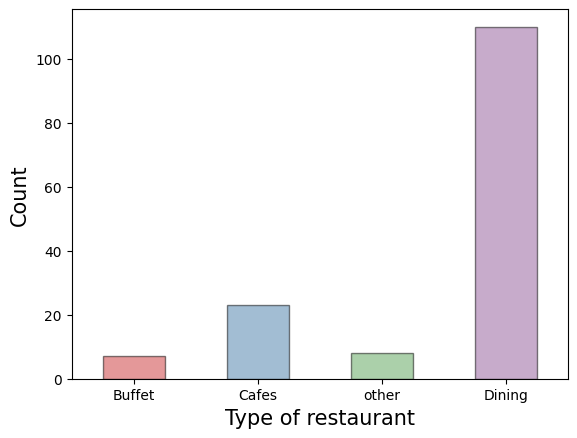

In [ ]:
sns.countplot(x=dataframe['listed_in(type)'],width=0.5,palette = "Set1",alpha=0.5,edgecolor="black")  #it makes the count plot on the basis of listed_in(type) column
plt.xlabel("Type of restaurant", fontsize=15) #it gives x axis name
plt.ylabel("Count", fontsize=15) #it gives y axis name

**Inference:-** The majority of the restaurants fall into the dining category.

                 Total Votes
listed_in(type)             
Buffet                  3028
Cafes                   6434
Dining                 20363
other                   9367


Text(0, 0.5, 'Votes')

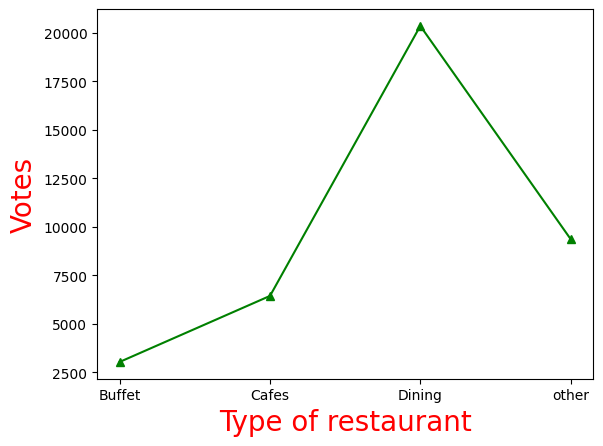

In [35]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum() #it group the data as per listed_in(type) column and show the total votes of each category.
result = pd.DataFrame({'Total Votes': grouped_data}) #it makes dataframe of two columns listed_in(type) and  Total Votes.
print(result)
plt.plot(result, c='green', marker='^') #plot the line chart
plt.xlabel('Type of restaurant', c='red', size=20) #it gives x axis name
plt.ylabel('Votes', c='red', size=20) #it gives y axis name

**Inference:-** Dining restaurants are preferred by a larger number of individuals.

**Now we will determine the restaurant’s name that received the maximum votes based on a given dataframe.**

In [36]:
max_votes = dataframe['votes'].max() #it assigns the maximum value of votes in max_votes variable.
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name'] #it check the condition and return restaurant name where condition is true.

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


**Let’s explore the online_order column.**

C:\Users\YASH\AppData\Local\Temp\ipykernel_15092\2341017129.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['online_order'],width=0.5, palette="Set2") #create count plot as per online_order column.


<Axes: xlabel='online_order', ylabel='count'>

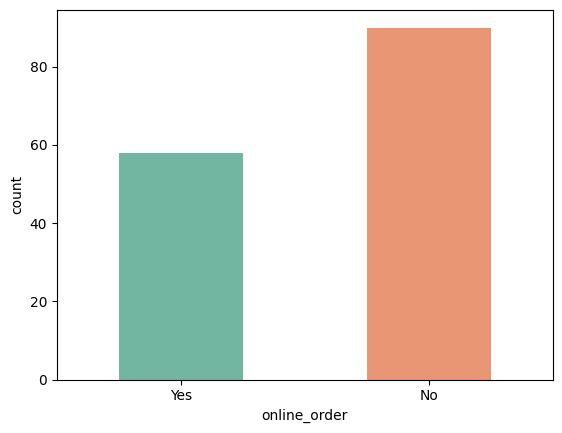

In [37]:
sns.countplot(x=dataframe['online_order'],width=0.5, palette="Set2") #create count plot as per online_order column.

**Inference:-** This suggests that a majority of the restaurants do not accept online orders.

**Let’s explore the rate column.**

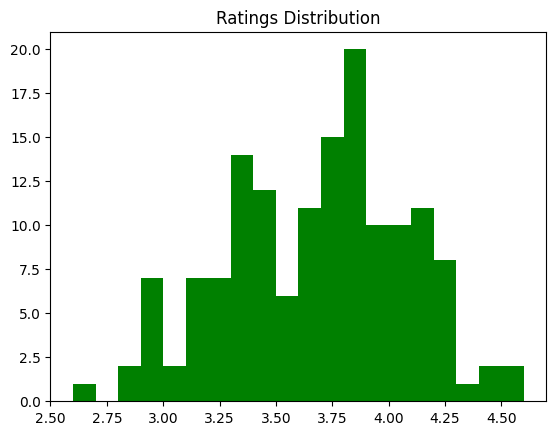

In [39]:
plt.hist(dataframe['rate'].apply(handleRate),bins=20, color="green",alpha=1) #plot the histogram which shows the rating distribution.
plt.title('Ratings Distribution') #it gives the name of the chart
plt.show()

**Inference:-** The majority of restaurants received ratings ranging from 3.5 to 4.

**Let’s explore the approx_cost(for two people) column.**

C:\Users\YASH\AppData\Local\Temp\ipykernel_10296\3969306804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_data, palette = "Set2")


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

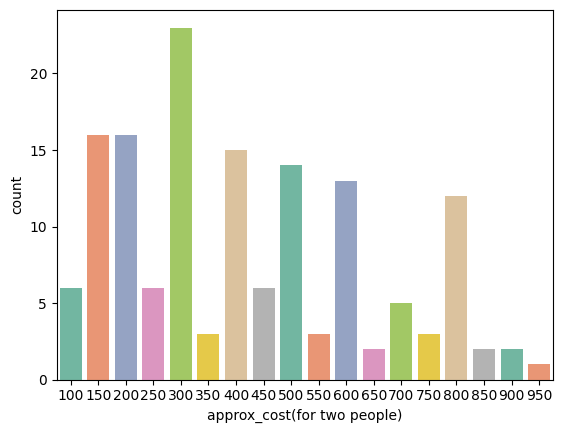

In [12]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data, palette = "Set2")

**Inference:-** The majority of couples prefer restaurants with an approximate cost of 300 rupees.

**Now we will examine whether online orders receive higher ratings than offline orders or not.**

C:\Users\YASH\AppData\Local\Temp\ipykernel_10296\511452828.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'online_order', y = 'rate', data = dataframe, palette="Set2")


<Axes: xlabel='online_order', ylabel='rate'>

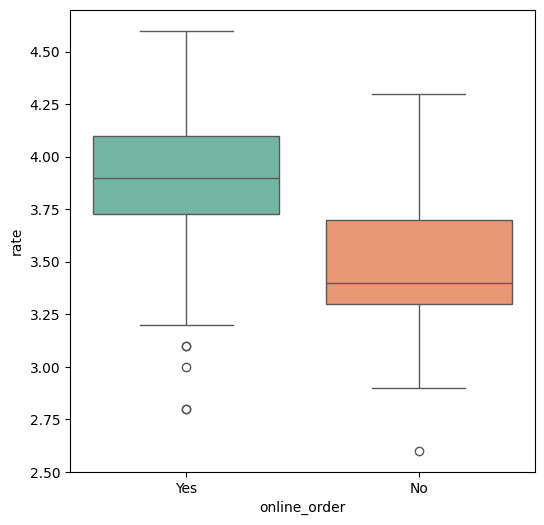

In [13]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe, palette="Set2")

**Inference:-** Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

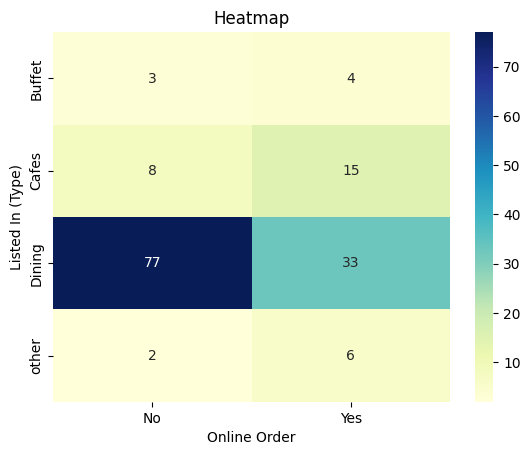

In [14]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

**Inference:-** Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.